In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io

# Path of the .txt file with the data
FILE_NAME = "./data/BODGE.txt"

df = pd.DataFrame(columns=["packet_id", "flag", "GS_T", "GS_RSSI", "GS_SNR", "FC_T", "FC_RSSI", "FC_SNR"])
csv_data = []

with open(FILE_NAME) as file:
    txt = file.readlines()
    csv_data = txt[3:-2]   # csv data excludes first 3 lines and last 2

raw_df = pd.read_csv(io.StringIO("".join(csv_data)), sep=',|:', engine='python', header=None)
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,713,CTS,GS_T,1.677,GS_RSSI,-49.0,GS_SNR,12.75,FC_T,205.240,FC_RSSI,-55.0,FC_SNR,12.00
1,714,ACK,GS_T,2.001,GS_RSSI,-48.0,GS_SNR,14.00,FC_T,205.558,FC_RSSI,-56.0,FC_SNR,12.75
2,715,CTS,GS_T,2.227,GS_RSSI,-48.0,GS_SNR,13.00,FC_T,205.785,FC_RSSI,-56.0,FC_SNR,12.75
3,716,ACK,GS_T,2.551,GS_RSSI,-49.0,GS_SNR,14.25,FC_T,206.109,FC_RSSI,-56.0,FC_SNR,12.00
4,717,CTS,GS_T,2.777,GS_RSSI,-50.0,GS_SNR,12.25,FC_T,206.336,FC_RSSI,-56.0,FC_SNR,12.00


In [11]:
df["packet_id"] = raw_df[0]
df["flag"]      = raw_df[1]
df["GS_T"]      = raw_df[3]
df["GS_RSSI"]   = raw_df[5]
df["GS_SNR"]    = raw_df[7]
df["FC_T"]      = raw_df[9]
df["FC_RSSI"]   = raw_df[11]
df["FC_SNR"]    = raw_df[13]

df.head()

,packet_id,flag,GS_T,GS_RSSI,GS_SNR,FC_T,FC_RSSI,FC_SNR
0,713,CTS,1.677,-49.0,12.75,205.240,-55.0,12.00
1,714,ACK,2.001,-48.0,14.00,205.558,-56.0,12.75
2,715,CTS,2.227,-48.0,13.00,205.785,-56.0,12.75
3,716,ACK,2.551,-49.0,14.25,206.109,-56.0,12.00
4,717,CTS,2.777,-50.0,12.25,206.336,-56.0,12.00


In [12]:
# Check that values are encoded properly
df["GS_RSSI"].dtype, df["GS_SNR"].dtype

(dtype('float64'), dtype('float64'))

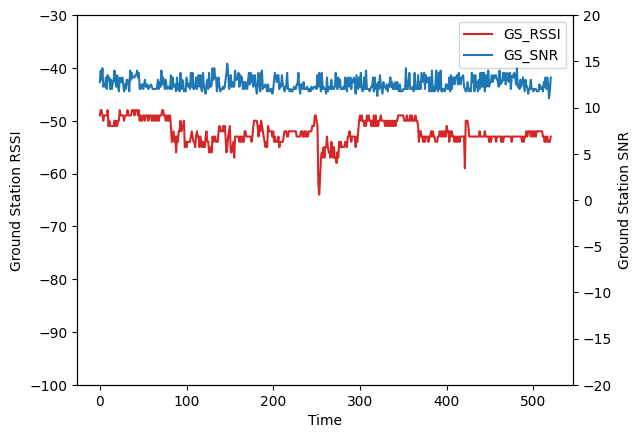

In [19]:
fig, ax1 = plt.subplots()

X = np.arange(len(csv_data))

color_rssi = 'tab:red'
ax1.set_xlabel("Time")
ax1.set_ylabel("Ground Station RSSI")
ax1.set_ylim(-100, -30)
line1, = ax1.plot(X, df["GS_RSSI"], color=color_rssi, label="GS_RSSI")

ax2 = ax1.twinx()
color_snr = "tab:blue"
ax2.set_ylabel("Ground Station SNR")
ax2.set_ylim(-20, 20)
line2, = ax2.plot(X, df["GS_SNR"], color=color_snr, label="GS_SNR")

lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')